<a href="https://colab.research.google.com/github/souravpanigrahilq/basic_repo/blob/main/Claim_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import pandas as pd

In [56]:
df1 = pd.read_csv('Train_IP.csv',encoding='latin-1')
df2 = pd.read_csv('Train_OP.csv',encoding='latin-1')
combined_df = pd.concat([df1, df2], ignore_index=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  558211 non-null  object 
 1   ClaimID                 558211 non-null  object 
 2   ClaimStartDt            558211 non-null  object 
 3   ClaimEndDt              558211 non-null  object 
 4   Provider                558211 non-null  object 
 5   InscClaimAmtReimbursed  558211 non-null  int64  
 6   AttendingPhysician      556703 non-null  object 
 7   OperatingPhysician      114447 non-null  object 
 8   OtherPhysician          199736 non-null  object 
 9   AdmissionDt             40474 non-null   object 
 10  ClmAdmitDiagnosisCode   145899 non-null  object 
 11  DeductibleAmtPaid       557312 non-null  float64
 12  DischargeDt             40474 non-null   object 
 13  DiagnosisGroupCode      40474 non-null   object 
 14  ClmDiagnosisCode_1  

In [57]:
df1


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,79092,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df1

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,79092,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df2


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [62]:
combined_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [63]:
df3= pd.read_csv('Train_BD.csv',encoding='latin-1')
df3.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [64]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [65]:
merged_df = pd.merge(combined_df, df3, on='BeneID', how='left')
merged_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,1,2,1,1,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,1,2,1,1,36000,3204,60,70
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,1,2,1,2,2,2,21260,2136,120,100


In [66]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 54 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   AdmissionDt                      40474 non-null   object 
 10  ClmAdmitDiagnosisCode            145899 non-null  object 
 11  DeductibleAmtPaid                557312 non-null  float64
 12  Di

In [67]:
merged_df['ClaimStartDt'] = pd.to_datetime(merged_df['ClaimStartDt'])
merged_df['ClaimEndDt'] = pd.to_datetime(merged_df['ClaimEndDt'])

# Calculate the difference between 'ClaimEndDt' and 'ClaimStartDt' in days
merged_df['ClaimDurationDays'] = (merged_df['ClaimEndDt'] - merged_df['ClaimStartDt']).dt.days


# Print the columns
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  datetime64[ns]
 3   ClaimEndDt                       558211 non-null  datetime64[ns]
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               556703 non-null  object        
 7   OperatingPhysician               114447 non-null  object        
 8   OtherPhysician                   199736 non-null  object        
 9   AdmissionDt                      40474 non-null   object        
 10  ClmAdmitDiagnosisCode            145899 non-

In [68]:
# Convert 'DOB' and 'ClaimStartDt' columns to datetime
merged_df['DOB'] = pd.to_datetime(merged_df['DOB'])
merged_df['ClaimStartDt'] = pd.to_datetime(merged_df['ClaimStartDt'])

# Calculate the age as the difference between 'ClaimStartDt' and 'DOB' in years
merged_df['Age'] = (merged_df['ClaimStartDt'] - merged_df['DOB']).dt.days // 365


# Display the DataFrame after adding the new 'Age' column and dropping the original 'DOB' column
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 56 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  datetime64[ns]
 3   ClaimEndDt                       558211 non-null  datetime64[ns]
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               556703 non-null  object        
 7   OperatingPhysician               114447 non-null  object        
 8   OtherPhysician                   199736 non-null  object        
 9   AdmissionDt                      40474 non-null   object        
 10  ClmAdmitDiagnosisCode            145899 non-

In [69]:
# List of columns to drop
columns_to_drop = ['OperatingPhysician', 'OtherPhysician', 'AdmissionDt', 'DischargeDt', 'DiagnosisGroupCode',
                   'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                   'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DOD']

# Drop columns
merged_df.drop(columns=columns_to_drop, inplace=True)


In [70]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 42 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  datetime64[ns]
 3   ClaimEndDt                       558211 non-null  datetime64[ns]
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               556703 non-null  object        
 7   ClmAdmitDiagnosisCode            145899 non-null  object        
 8   DeductibleAmtPaid                557312 non-null  float64       
 9   ClmDiagnosisCode_1               547758 non-null  object        
 10  ClmDiagnosisCode_2               362605 non-

We remove further columns that contain large null vlaues and are totally unrelated

<ipython-input-71-824224fc4a4b>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


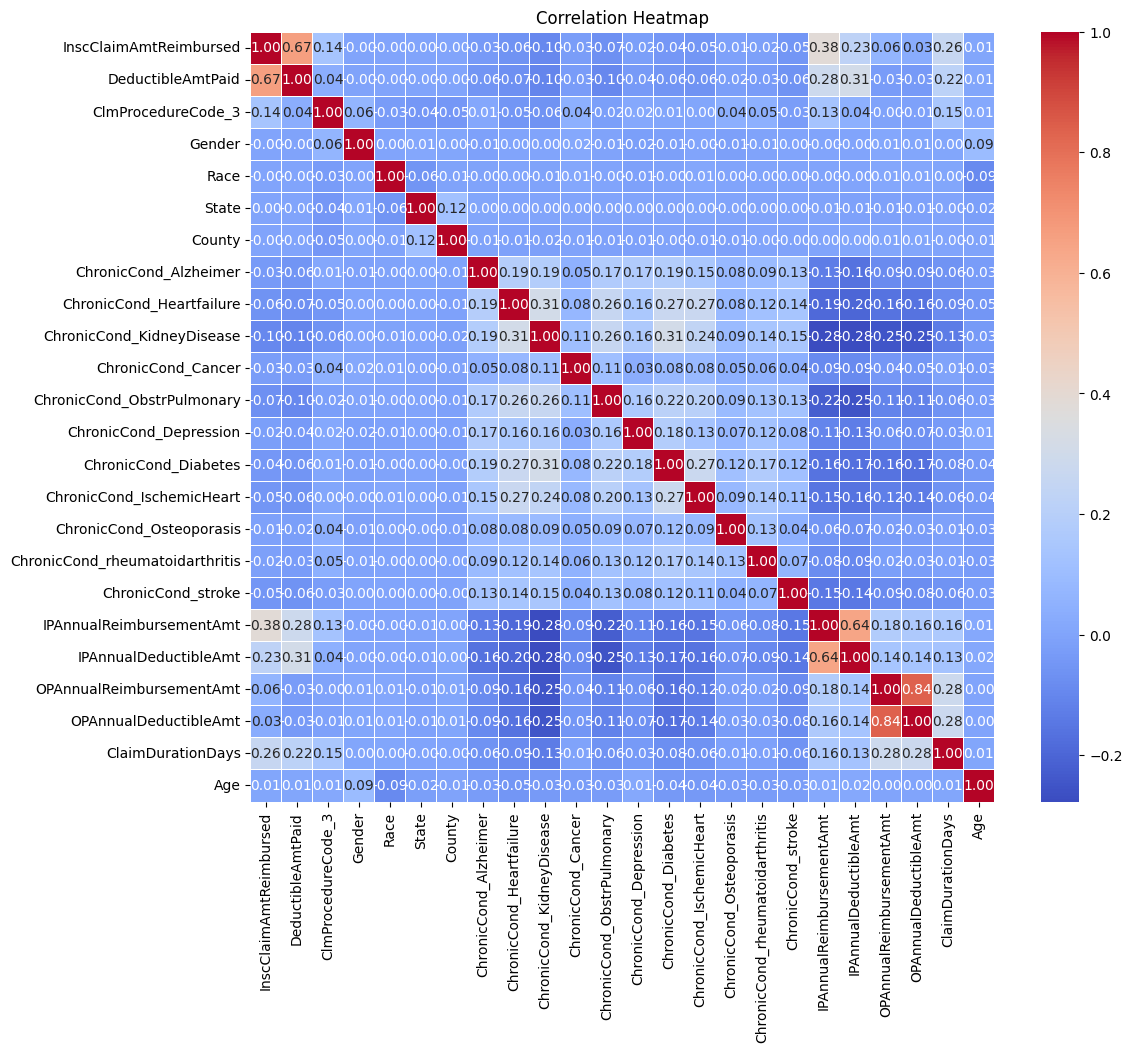

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your DataFrame (assuming it's named merged_df)
# merged_df = pd.read_csv("your_data.csv")

# List of columns to drop
columns_to_drop = ['ClaimStartDt', 'ClaimEndDt', 'BeneID', 'ClaimID', 'ClmDiagnosisCode_3',
                   'DOB', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
                   'ClmProcedureCode_1', 'ClmProcedureCode_2']

# Drop columns from DataFrame
merged_df.drop(columns=columns_to_drop, inplace=True)

# Compute the correlation matrix
correlation_matrix = merged_df.corr()

# Create the correlation heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [72]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Provider                         558211 non-null  object 
 1   InscClaimAmtReimbursed           558211 non-null  int64  
 2   AttendingPhysician               556703 non-null  object 
 3   ClmAdmitDiagnosisCode            145899 non-null  object 
 4   DeductibleAmtPaid                557312 non-null  float64
 5   ClmDiagnosisCode_1               547758 non-null  object 
 6   ClmDiagnosisCode_2               362605 non-null  object 
 7   ClmProcedureCode_3               969 non-null     float64
 8   Gender                           558211 non-null  int64  
 9   Race                             558211 non-null  int64  
 10  RenalDiseaseIndicator            558211 non-null  object 
 11  State                            558211 non-null  int64  
 12  Co

In [73]:
merged_df.drop(columns=['ClmAdmitDiagnosisCode','ClmProcedureCode_3'], inplace=True)


In [74]:
merged_df['ClmDiagnosisCode_1'].value_counts()

4019     13886
4011     12512
2724      3606
2720      3210
2722      3028
         ...  
37636        1
0261         1
9753         1
94120        1
64821        1
Name: ClmDiagnosisCode_1, Length: 10450, dtype: int64

In [75]:
merged_df.head()

,Provider,InscClaimAmtReimbursed,AttendingPhysician,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,Gender,Race,RenalDiseaseIndicator,State,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimDurationDays,Age
0,PRV55912,26000,PHY390922,1068.0,1970,4019,1,1,0,39,...,1,2,1,1,36000,3204,60,70,6,66
1,PRV55907,5000,PHY318495,1068.0,6186,2948,1,1,0,39,...,1,2,1,1,36000,3204,60,70,2,66
2,PRV56046,5000,PHY372395,1068.0,29623,30390,1,1,0,39,...,1,2,1,1,36000,3204,60,70,3,66
3,PRV52405,5000,PHY369659,1068.0,43491,2762,2,2,0,1,...,2,2,1,1,5000,1068,250,320,8,95
4,PRV56614,10000,PHY379376,1068.0,042,3051,2,1,Y,45,...,1,2,2,2,21260,2136,120,100,17,71


In [76]:
merged_df.nunique()

Provider                            5410
InscClaimAmtReimbursed               438
AttendingPhysician                 82063
DeductibleAmtPaid                     17
ClmDiagnosisCode_1                 10450
ClmDiagnosisCode_2                  5300
Gender                                 2
Race                                   4
RenalDiseaseIndicator                  2
State                                 52
County                               314
ChronicCond_Alzheimer                  2
ChronicCond_Heartfailure               2
ChronicCond_KidneyDisease              2
ChronicCond_Cancer                     2
ChronicCond_ObstrPulmonary             2
ChronicCond_Depression                 2
ChronicCond_Diabetes                   2
ChronicCond_IschemicHeart              2
ChronicCond_Osteoporasis               2
ChronicCond_rheumatoidarthritis        2
ChronicCond_stroke                     2
IPAnnualReimbursementAmt            3004
IPAnnualDeductibleAmt                147
OPAnnualReimburs

In [77]:
merged_df.head()

,Provider,InscClaimAmtReimbursed,AttendingPhysician,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,Gender,Race,RenalDiseaseIndicator,State,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimDurationDays,Age
0,PRV55912,26000,PHY390922,1068.0,1970,4019,1,1,0,39,...,1,2,1,1,36000,3204,60,70,6,66
1,PRV55907,5000,PHY318495,1068.0,6186,2948,1,1,0,39,...,1,2,1,1,36000,3204,60,70,2,66
2,PRV56046,5000,PHY372395,1068.0,29623,30390,1,1,0,39,...,1,2,1,1,36000,3204,60,70,3,66
3,PRV52405,5000,PHY369659,1068.0,43491,2762,2,2,0,1,...,2,2,1,1,5000,1068,250,320,8,95
4,PRV56614,10000,PHY379376,1068.0,042,3051,2,1,Y,45,...,1,2,2,2,21260,2136,120,100,17,71


In [78]:
# Drop the 'Provider' column
merged_df.drop(columns=['Provider'], inplace=True)

In [79]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   InscClaimAmtReimbursed           558211 non-null  int64  
 1   AttendingPhysician               556703 non-null  object 
 2   DeductibleAmtPaid                557312 non-null  float64
 3   ClmDiagnosisCode_1               547758 non-null  object 
 4   ClmDiagnosisCode_2               362605 non-null  object 
 5   Gender                           558211 non-null  int64  
 6   Race                             558211 non-null  int64  
 7   RenalDiseaseIndicator            558211 non-null  object 
 8   State                            558211 non-null  int64  
 9   County                           558211 non-null  int64  
 10  ChronicCond_Alzheimer            558211 non-null  int64  
 11  ChronicCond_Heartfailure         558211 non-null  int64  
 12  Ch

In [80]:
merged_df.RenalDiseaseIndicator.isnull().sum()

0

In [81]:
selected_df1 = pd.DataFrame(merged_df)

# Columns to process
columns_to_process = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2']
# Loop through columns and remove leading characters 'V' or 'E'
for col in columns_to_process:
    selected_df1[col] = selected_df1[col].str.lstrip('VE')

# Convert the columns to numeric
selected_df1[columns_to_process] = selected_df1[columns_to_process].apply(pd.to_numeric, errors='coerce')

# Check the modified DataFrame
selected_df1.head(100)

,InscClaimAmtReimbursed,AttendingPhysician,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,Gender,Race,RenalDiseaseIndicator,State,County,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimDurationDays,Age
0,26000,PHY390922,1068.0,1970.0,4019.0,1,1,0,39,230,...,1,2,1,1,36000,3204,60,70,6,66
1,5000,PHY318495,1068.0,6186.0,2948.0,1,1,0,39,230,...,1,2,1,1,36000,3204,60,70,2,66
2,5000,PHY372395,1068.0,29623.0,30390.0,1,1,0,39,230,...,1,2,1,1,36000,3204,60,70,3,66
3,5000,PHY369659,1068.0,43491.0,2762.0,2,2,0,1,360,...,2,2,1,1,5000,1068,250,320,8,95
4,10000,PHY379376,1068.0,42.0,3051.0,2,1,Y,45,780,...,1,2,2,2,21260,2136,120,100,17,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11000,PHY362864,1068.0,486.0,725.0,2,1,0,22,70,...,1,2,2,2,11000,1068,0,0,8,73
96,20000,PHY351542,1068.0,78559.0,591.0,1,2,Y,3,130,...,1,1,1,2,31000,3204,0,0,1,43
97,7000,PHY422690,1068.0,29570.0,25000.0,1,2,Y,3,130,...,1,1,1,2,31000,3204,0,0,18,43
98,4000,PHY422690,1068.0,79902.0,5303.0,1,2,Y,3,130,...,1,1,1,2,31000,3204,0,0,3,43


In [82]:
# Assuming your DataFrame is named merged_df


# Strategy 1: Fill missing values in 'AttendingPhysician' with the most frequent value (mode)
selected_df1['AttendingPhysician'].fillna(selected_df1['AttendingPhysician'].mode()[0], inplace=True)

# Strategy 2: Fill missing values in 'DeductibleAmtPaid' with the mean of the column
selected_df1['DeductibleAmtPaid'].fillna(selected_df1['DeductibleAmtPaid'].mean(), inplace=True)

selected_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   InscClaimAmtReimbursed           558211 non-null  int64  
 1   AttendingPhysician               558211 non-null  object 
 2   DeductibleAmtPaid                558211 non-null  float64
 3   ClmDiagnosisCode_1               547758 non-null  float64
 4   ClmDiagnosisCode_2               362605 non-null  float64
 5   Gender                           558211 non-null  int64  
 6   Race                             558211 non-null  int64  
 7   RenalDiseaseIndicator            558211 non-null  object 
 8   State                            558211 non-null  int64  
 9   County                           558211 non-null  int64  
 10  ChronicCond_Alzheimer            558211 non-null  int64  
 11  ChronicCond_Heartfailure         558211 non-null  int64  
 12  Ch

In [83]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the categorical column 'AttendingPhysician'
merged_df['AttendingPhysician_encoded'] = label_encoder.fit_transform(merged_df['AttendingPhysician'])

# 'RenalDiseaseIndicator' as another categorical column:
merged_df['RenalDiseaseIndicator_encoded'] = label_encoder.fit_transform(merged_df['RenalDiseaseIndicator'])

# 'ClaimDiagnosis' converting into categorical data:
# merged_df['ClmDiagnosisCode_1_Encoded'] = label_encoder.fit_transform(merged_df['ClmDiagnosisCode_1'])

# Display the modified DataFrame
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   InscClaimAmtReimbursed           558211 non-null  int64  
 1   AttendingPhysician               556703 non-null  object 
 2   DeductibleAmtPaid                558211 non-null  float64
 3   ClmDiagnosisCode_1               547758 non-null  object 
 4   ClmDiagnosisCode_2               362605 non-null  object 
 5   Gender                           558211 non-null  int64  
 6   Race                             558211 non-null  int64  
 7   RenalDiseaseIndicator            558211 non-null  object 
 8   State                            558211 non-null  int64  
 9   County                           558211 non-null  int64  
 10  ChronicCond_Alzheimer            558211 non-null  int64  
 11  ChronicCond_Heartfailure         558211 non-null  int64  
 12  Ch

In [84]:
merged_df.AttendingPhysician_encoded.value_counts()

13066    2534
26182    1628
82063    1508
67342    1321
74942    1223
         ... 
28556       1
81428       1
81905       1
51101       1
4395        1
Name: AttendingPhysician_encoded, Length: 82064, dtype: int64

In [85]:
merged_df.RenalDiseaseIndicator_encoded.value_counts()

0    448363
1    109848
Name: RenalDiseaseIndicator_encoded, dtype: int64

In [86]:
merged_df.Gender.value_counts()

2    323114
1    235097
Name: Gender, dtype: int64

In [87]:
merged_df.head(10)

,InscClaimAmtReimbursed,AttendingPhysician,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,Gender,Race,RenalDiseaseIndicator,State,County,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimDurationDays,Age,AttendingPhysician_encoded,RenalDiseaseIndicator_encoded
0,26000,PHY390922,1068.0,1970,4019,1,1,0,39,230,...,1,1,36000,3204,60,70,6,66,53275,0
1,5000,PHY318495,1068.0,6186,2948,1,1,0,39,230,...,1,1,36000,3204,60,70,2,66,4951,0
2,5000,PHY372395,1068.0,29623,30390,1,1,0,39,230,...,1,1,36000,3204,60,70,3,66,40843,0
3,5000,PHY369659,1068.0,43491,2762,2,2,0,1,360,...,1,1,5000,1068,250,320,8,95,39020,0
4,10000,PHY379376,1068.0,042,3051,2,1,Y,45,780,...,2,2,21260,2136,120,100,17,71,45475,1
5,8000,PHY402711,1068.0,1745,4571,2,1,0,31,270,...,1,1,22000,2136,1400,840,6,69,61073,0
6,8000,PHY412314,1068.0,1536,73300,1,2,0,24,120,...,1,2,8000,1068,860,50,5,69,67458,0
7,6000,PHY346286,1068.0,56212,25000,1,1,0,38,230,...,2,2,6000,1068,0,0,4,67,23581,0
8,7000,PHY385030,1068.0,42823,4280,2,1,0,38,200,...,2,2,23650,2136,40,0,3,64,49307,0
9,29000,PHY355604,1068.0,41041,3669,2,1,0,34,760,...,1,1,131140,2136,1650,80,7,62,29716,0


In [88]:
# List of columns to drop
columns_to_drop = ['AttendingPhysician','RenalDiseaseIndicator']
# Drop columns
merged_df.drop(columns=columns_to_drop, inplace=True)

In [89]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   InscClaimAmtReimbursed           558211 non-null  int64  
 1   DeductibleAmtPaid                558211 non-null  float64
 2   ClmDiagnosisCode_1               547758 non-null  object 
 3   ClmDiagnosisCode_2               362605 non-null  object 
 4   Gender                           558211 non-null  int64  
 5   Race                             558211 non-null  int64  
 6   State                            558211 non-null  int64  
 7   County                           558211 non-null  int64  
 8   ChronicCond_Alzheimer            558211 non-null  int64  
 9   ChronicCond_Heartfailure         558211 non-null  int64  
 10  ChronicCond_KidneyDisease        558211 non-null  int64  
 11  ChronicCond_Cancer               558211 non-null  int64  
 12  Ch

In [90]:
merged_df.drop(columns=['ClmDiagnosisCode_2','ClmDiagnosisCode_1'], inplace=True)

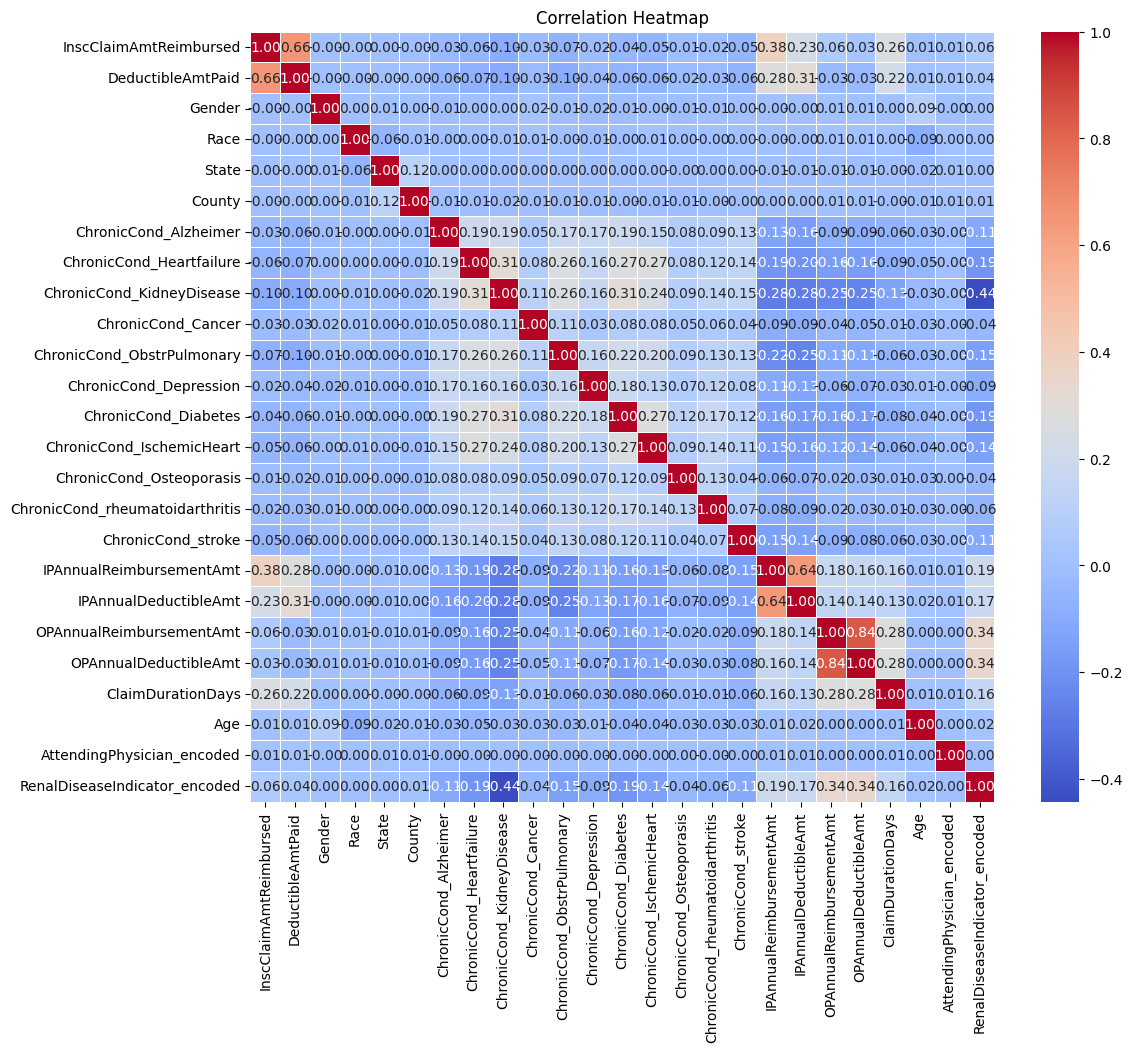

In [91]:
correlation_matrix = merged_df.corr()

# Create the correlation heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [92]:
merged_df.drop(columns=['Age','AttendingPhysician_encoded','Gender','Race','County','State','ChronicCond_Osteoporasis'], inplace=True)

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [94]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   InscClaimAmtReimbursed           558211 non-null  int64  
 1   DeductibleAmtPaid                558211 non-null  float64
 2   ChronicCond_Alzheimer            558211 non-null  int64  
 3   ChronicCond_Heartfailure         558211 non-null  int64  
 4   ChronicCond_KidneyDisease        558211 non-null  int64  
 5   ChronicCond_Cancer               558211 non-null  int64  
 6   ChronicCond_ObstrPulmonary       558211 non-null  int64  
 7   ChronicCond_Depression           558211 non-null  int64  
 8   ChronicCond_Diabetes             558211 non-null  int64  
 9   ChronicCond_IschemicHeart        558211 non-null  int64  
 10  ChronicCond_rheumatoidarthritis  558211 non-null  int64  
 11  ChronicCond_stroke               558211 non-null  int64  
 12  IP

In [95]:
from scipy import stats

# Define a function to remove outliers based on z-score
def remove_outliers(df):
    # Iterate over each column
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            # Calculate z-scores
            z_scores = stats.zscore(df[col])
            # Identify outliers (z-score > 3 or z-score < -3)
            outlier_mask = (z_scores > 4) | (z_scores < -4)
            # Remove rows containing outliers
            df = df[~outlier_mask]
    return df

# Remove outliers from the merged_df DataFrame
merged_df_no_outliers = remove_outliers(merged_df)

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
# Assuming your DataFrame is named 'data'

# Define features (X) and target variable (y)
X = merged_df_no_outliers.drop(columns=['InscClaimAmtReimbursed'])  # Features
y = merged_df_no_outliers['InscClaimAmtReimbursed']                # Target variable

X = scaler.fit_transform(X);

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)
print("Mean Squared Error:", mse)

# Optionally, you can also print the coefficients and intercept of the model
# print("Coefficients:", model.coef_)
# print("Intercept:", model.intercept_)


R^2 Score: 0.6898127188014525
Mean Squared Error: 1090417.8904018255


In [99]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=100)
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
print("MSE :", mean_squared_error(y_test, y_pred))
print("R2 Score :",r2_score(y_test, y_pred))

MSE : 606483.35632524
R2 Score : 0.8274758466028362


In [101]:
!pip install xgboost
import xgboost
from  xgboost import XGBRegressor
model3= XGBRegressor(n_estimators=100)
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)
print("MSE :", mean_squared_error(y_test, y_pred))
print("R2 Score :",r2_score(y_test, y_pred))

MSE : 507725.13352605427
R2 Score : 0.8555692453774943


In [102]:
from sklearn.ensemble import GradientBoostingRegressor
model2 = GradientBoostingRegressor(n_estimators=100)
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
print("MSE :", mean_squared_error(y_test, y_pred))
print("R2 Score :",r2_score(y_test, y_pred))

MSE : 502371.3368827782
R2 Score : 0.8570922207793888


# TRY OTHER MODELS

In [ ]:
# List of columns to drop
columns_to_drop = ['Race','State','County','Gender']
# Drop columns
merged_df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
merged_df.info()

In [ ]:
import matplotlib.pyplot as plt

# Define numeric columns for plotting
numeric_columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
                   'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
                   'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
                   'ChronicCond_stroke', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
                   'OPAnnualDeductibleAmt', 'ClaimDurationDays', 'Age', 'AttendingPhysician_encoded', 'RenalDiseaseIndicator_encoded',
                   'ClmDiagnosisCode_1_Encoded']

# Create box plots for numeric columns
plt.figure(figsize=(14, 8))
merged_df[numeric_columns].boxplot(rot=45)
plt.title('Box Plot of Numeric Columns')
plt.xlabel('Column Names')
plt.ylabel('Values')
plt.show()

In [ ]:
from scipy import stats

# Define a function to remove outliers based on z-score
def remove_outliers(df):
    # Iterate over each column
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            # Calculate z-scores
            z_scores = stats.zscore(df[col])
            # Identify outliers (z-score > 3 or z-score < -3)
            outlier_mask = (z_scores > 4) | (z_scores < -4)
            # Remove rows containing outliers
            df = df[~outlier_mask]
    return df

# Remove outliers from the merged_df DataFrame
merged_df_no_outliers = remove_outliers(merged_df)


# Create box plots for numeric columns
plt.figure(figsize=(14, 8))
merged_df_no_outliers[numeric_columns].boxplot(rot=45)
plt.title('Box Plot of Numeric Columns')
plt.xlabel('Column Names')
plt.ylabel('Values')
plt.show()


In [ ]:
merged_df_no_outliers.info()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your DataFrame is named 'merged_df'

# Define features (X) and target variable (y)
X = merged_df.drop(columns=['InscClaimAmtReimbursed'])  # Features
y = merged_df['InscClaimAmtReimbursed']                  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)